In [164]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [140]:
#https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b
#https://www.baseball-reference.com/teams/BOS/2019-schedule-scores.shtml
crime = pd.read_csv('bostoncrime.csv')
event = pd.read_csv('baseball.csv')

/Users/briannabeshkin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [141]:
print(event)

           Dates Home_team_played
0  9/23/19 15:00                Y
1   9/9/19 15:00                Y
2  9/16/19 15:00                N
3   9/2/19 15:00                N


In [145]:
#aggregating crime data hourly to get total number of incidents for every hour
crime["OCCURRED_ON_DATE"] = pd.to_datetime(crime["OCCURRED_ON_DATE"])
agg = crime.set_index("OCCURRED_ON_DATE").resample("1H").count()
agg

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2015-06-15 00:00:00               14            14                  14   
2015-06-15 01:00:00               10            10                  10   
2015-06-15 02:00:00                7             7                   7   
2015-06-15 03:00:00                3             3                   3   
2015-06-15 04:00:00                1             1                   1   
...                              ...           ...                 ...   
2020-04-24 00:00:00                5             5                   0   
2020-04-24 01:00:00                4             4                   0   
2020-04-24 02:00:00                3             3                   0   
2020-04-24 03:00:00                1             1                   0   
2020-04-24 04:00:00                1             1                   0   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2015-06-15 00:00:00                   14        13              14         0   
2015-06-15 01:00:00                   10        10              10         0   
2015-06-15 02:00:00                    7         7               7         0   
2015-06-15 03:00:00                    3         3               3         0   
2015-06-15 04:00:00                    1         1               1         0   
...                                  ...       ...             ...       ...   
2020-04-24 00:00:00                    5         5               5         5   
2020-04-24 01:00:00                    4         4               4         4   
2020-04-24 02:00:00                    3         3               3         3   
2020-04-24 03:00:00                    1         1               1         1   
2020-04-24 04:00:00                    1         1               1         1   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2015-06-15 00:00:00    14     14           14    14        14      14   14   
2015-06-15 01:00:00    10     10           10    10        10      10   10   
2015-06-15 02:00:00     7      7            7     7         7       7    7   
2015-06-15 03:00:00     3      3            3     3         3       3    3   
2015-06-15 04:00:00     1      1            1     1         1       1    1   
...                   ...    ...          ...   ...       ...     ...  ...   
2020-04-24 00:00:00     5      5            5     5         0       5    5   
2020-04-24 01:00:00     4      4            4     4         0       4    4   
2020-04-24 02:00:00     3      3            3     3         0       3    3   
2020-04-24 03:00:00     1      1            1     1         0       1    1   
2020-04-24 04:00:00     1      1            1     1         0       1    1   

                     Long  Location  
OCCURRED_ON_DATE                     
2015-06-15 00:00:00    14        14  
2015-06-15 01:00:00    10        10  
2015-06-15 02:00:00     7         7  
2015-06-15 03:00:00     3         3  
2015-06-15 04:00:00     1         1  
...                   ...       ...  
2020-04-24 00:00:00     5         5  
2020-04-24 01:00:00     4         4  
2020-04-24 02:00:00     3         3  
2020-04-24 03:00:00     1         1  
2020-04-24 04:00:00     1         1  

[42605 rows x 16 columns]

In [146]:
#filtering crime data set for two hours before the game (event 1)

#filter only games that did play
event["Dates"] = pd.to_datetime(event["Dates"])
playedevent = event.loc[event["Home_team_played"]=="Y"]
#filter for each hour before the game
before1 = playedevent.Dates[0] + timedelta(hours=-2)
before2 = playedevent.Dates[0] + timedelta(hours=-1)
beforehourone = agg.loc[agg.index==before1]
beforehourtwo = agg.loc[agg.index==before2]
#concatenate data for both hour before the game
beforeevent = pd.concat([beforehourone,beforehourtwo])
beforeevent

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-23 13:00:00               16            16                  16   
2019-09-23 14:00:00               12            12                  12   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-23 13:00:00                   16        16              16         0   
2019-09-23 14:00:00                   12        12              12         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-23 13:00:00    16     16           16    16        16      16   12   
2019-09-23 14:00:00    12     12           12    12        12      12   10   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-23 13:00:00    12        16  
2019-09-23 14:00:00    10        12

In [121]:
#filtering crime data set for hours during the game (event 1)

#filter for each hour of the game
eventshourone = agg.loc[agg.index==playedevent.Dates[0]]
hourtwo = playedevent.Dates[0] + timedelta(hours=1)
hourthree = playedevent.Dates[0] + timedelta(hours=2)
eventshourtwo = agg.loc[agg.index==hourtwo]
eventshourthree = agg.loc[agg.index==hourthree]
#concatenate data for all hours during the game
duringevent = pd.concat([eventshourone,eventshourtwo,eventshourthree])
duringevent

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-23 15:00:00               15            15                  15   
2019-09-23 16:00:00               30            30                  30   
2019-09-23 17:00:00               20            20                  20   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-23 15:00:00                   15        15              15         0   
2019-09-23 16:00:00                   30        29              30         0   
2019-09-23 17:00:00                   20        20              20         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-23 15:00:00    15     15           15    15        15      15   13   
2019-09-23 16:00:00    30     30           30    30        30      29   27   
2019-09-23 17:00:00    20     20           20    20        20      20   20   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-23 15:00:00    13        15  
2019-09-23 16:00:00    27        30  
2019-09-23 17:00:00    20        20

In [122]:
#filtering crime data set for two hours after the game (event 1)

#filter for each hour before the game
after1 = playedevent.Dates[0] + timedelta(hours=3)
after2 = playedevent.Dates[0] + timedelta(hours=4)
afterhourone = agg.loc[agg.index==after1]
afterhourtwo = agg.loc[agg.index==after2]
#concatenate data for both hour before the game
afterevent = pd.concat([afterhourone,afterhourtwo])
afterevent

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-23 18:00:00               13            13                  13   
2019-09-23 19:00:00               18            18                  18   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-23 18:00:00                   13        13              13         0   
2019-09-23 19:00:00                   18        18              18         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-23 18:00:00    13     13           13    13        13      13   10   
2019-09-23 19:00:00    18     18           18    18        18      18   16   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-23 18:00:00    10        13  
2019-09-23 19:00:00    16        18

Baseball game - second date

In [125]:
#filtering crime data set for two hours before the game (event 2)

#filter only games that did play
event["Dates"] = pd.to_datetime(event["Dates"])
playedevent = event.loc[event["Home_team_played"]=="Y"]
#filter for each hour before the game
before1 = playedevent.Dates[1] + timedelta(hours=-2)
before2 = playedevent.Dates[1] + timedelta(hours=-1)
beforehourone = agg.loc[agg.index==before1]
beforehourtwo = agg.loc[agg.index==before2]
#concatenate data for both hour before the game
beforeevent2 = pd.concat([beforehourone,beforehourtwo])
beforeevent2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-09 13:00:00                8             8                   8   
2019-09-09 14:00:00               15            15                  15   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-09 13:00:00                    8         8               8         0   
2019-09-09 14:00:00                   15        15              15         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-09 13:00:00     8      8            8     8         8       8    8   
2019-09-09 14:00:00    15     15           15    15        15      15   14   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-09 13:00:00     8         8  
2019-09-09 14:00:00    14        15

In [226]:
#filtering crime data set for hours during the game (event 2)

#filter for each hour of the game
eventshourone = agg.loc[agg.index==playedevent.Dates[1]]
hourtwo = playedevent.Dates[1] + timedelta(hours=1)
hourthree = playedevent.Dates[1] + timedelta(hours=2)
eventshourtwo = agg.loc[agg.index==hourtwo]
eventshourthree = agg.loc[agg.index==hourthree]
#concatenate data for all hours during the game
duringevent2 = pd.concat([eventshourone,eventshourtwo,eventshourthree])
duringevent2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-09 15:00:00                6             6                   6   
2019-09-09 16:00:00               23            23                  23   
2019-09-09 17:00:00               26            26                  26   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-09 15:00:00                    6         6               6         0   
2019-09-09 16:00:00                   23        23              23         0   
2019-09-09 17:00:00                   26        26              26         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-09 15:00:00     6      6            6     6         6       6    3   
2019-09-09 16:00:00    23     23           23    23        23      23   21   
2019-09-09 17:00:00    26     26           26    26        26      24   20   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-09 15:00:00     3         6  
2019-09-09 16:00:00    21        23  
2019-09-09 17:00:00    20        26

In [127]:
#filtering crime data set for two hours after the game (event 2)

#filter for each hour before the game
after1 = playedevent.Dates[1] + timedelta(hours=3)
after2 = playedevent.Dates[1] + timedelta(hours=4)
afterhourone = agg.loc[agg.index==after1]
afterhourtwo = agg.loc[agg.index==after2]
#concatenate data for both hour before the game
afterevent2 = pd.concat([afterhourone,afterhourtwo])
afterevent2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-09 18:00:00               21            21                  21   
2019-09-09 19:00:00               26            26                  26   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-09 18:00:00                   21        21              21         0   
2019-09-09 19:00:00                   26        25              26         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-09 18:00:00    21     21           21    21        21      21   21   
2019-09-09 19:00:00    26     26           26    26        26      25   25   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-09 18:00:00    21        21  
2019-09-09 19:00:00    25        26

Constant - first date

In [158]:
#filtering crime data set for two hours before the game time (constant 1)

#filter only games that did play
event["Dates"] = pd.to_datetime(event["Dates"])
noplayedevent = event.loc[event["Home_team_played"]=="N"]
#filter for each hour before the game
before1 = noplayedevent.Dates[2] + timedelta(hours=-2)
before2 = noplayedevent.Dates[2] + timedelta(hours=-1)
beforehourone = agg.loc[agg.index==before1]
beforehourtwo = agg.loc[agg.index==before2]
#concatenate data for both hour before the game
beforenoevent = pd.concat([beforehourone,beforehourtwo])
beforenoevent

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-16 13:00:00               18            18                  18   
2019-09-16 14:00:00                9             9                   9   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-16 13:00:00                   18        18              18         0   
2019-09-16 14:00:00                    9         9               9         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-16 13:00:00    18     18           18    18        18      18   16   
2019-09-16 14:00:00     9      9            9     9         9       9    7   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-16 13:00:00    16        18  
2019-09-16 14:00:00     7         9

In [223]:
#filtering crime data set for hours during the game time (constant 1)

#filter for each hour of the game
eventshourone = agg.loc[agg.index==noplayedevent.Dates[2]]
hourtwo = noplayedevent.Dates[2] + timedelta(hours=1)
hourthree = noplayedevent.Dates[2] + timedelta(hours=2)
eventshourtwo = agg.loc[agg.index==hourtwo]
eventshourthree = agg.loc[agg.index==hourthree]
#concatenate data for all hours during the game
duringnoevent = pd.concat([eventshourone,eventshourtwo,eventshourthree])
duringnoevent

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-16 15:00:00               19            19                  19   
2019-09-16 16:00:00               16            16                  16   
2019-09-16 17:00:00               22            22                  22   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-16 15:00:00                   19        19              19         0   
2019-09-16 16:00:00                   16        15              16         0   
2019-09-16 17:00:00                   22        22              22         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-16 15:00:00    19     19           19    19        19      19   18   
2019-09-16 16:00:00    16     16           16    16        16      15   14   
2019-09-16 17:00:00    22     22           22    22        22      22   22   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-16 15:00:00    18        19  
2019-09-16 16:00:00    14        16  
2019-09-16 17:00:00    22        22

In [160]:
#filtering crime data set for two hours after the game time (constant 1)

#filter for each hour before the game
after1 = noplayedevent.Dates[2] + timedelta(hours=3)
after2 = noplayedevent.Dates[2] + timedelta(hours=4)
afterhourone = agg.loc[agg.index==after1]
afterhourtwo = agg.loc[agg.index==after2]
#concatenate data for both hour before the game
afternoevent = pd.concat([afterhourone,afterhourtwo])
afternoevent

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-16 18:00:00               20            20                  20   
2019-09-16 19:00:00               20            20                  20   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-16 18:00:00                   20        19              20         0   
2019-09-16 19:00:00                   20        20              20         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-16 18:00:00    20     20           20    20        20      19   20   
2019-09-16 19:00:00    20     20           20    20        20      19   16   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-16 18:00:00    20        20  
2019-09-16 19:00:00    16        20

No baseball game - second date

In [161]:
#filtering crime data set for two hours before the game time (constant 2)

#filter only games that did play
event["Dates"] = pd.to_datetime(event["Dates"])
noplayedevent = event.loc[event["Home_team_played"]=="N"]
#filter for each hour before the game
before1 = noplayedevent.Dates[3] + timedelta(hours=-2)
before2 = noplayedevent.Dates[3] + timedelta(hours=-1)
beforehourone = agg.loc[agg.index==before1]
beforehourtwo = agg.loc[agg.index==before2]
#concatenate data for both hour before the game
beforenoevent2 = pd.concat([beforehourone,beforehourtwo])
beforenoevent2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-02 13:00:00               11            11                  11   
2019-09-02 14:00:00               14            14                  14   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-02 13:00:00                   11        11              11         0   
2019-09-02 14:00:00                   14        14              14         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-02 13:00:00    11     11           11    11        11      11   11   
2019-09-02 14:00:00    14     14           14    14        14      14   14   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-02 13:00:00    11        11  
2019-09-02 14:00:00    14        14

In [225]:
#filtering crime data set for hours during the game time (constant 2)

#filter for each hour of the game
eventshourone = agg.loc[agg.index==noplayedevent.Dates[3]]
hourtwo = noplayedevent.Dates[3] + timedelta(hours=1)
hourthree = noplayedevent.Dates[3] + timedelta(hours=2)
eventshourtwo = agg.loc[agg.index==hourtwo]
eventshourthree = agg.loc[agg.index==hourthree]
#concatenate data for all hours during the game
duringnoevent2 = pd.concat([eventshourone,eventshourtwo,eventshourthree])
duringnoevent2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-02 15:00:00               13            13                  13   
2019-09-02 16:00:00               21            21                  21   
2019-09-02 17:00:00               28            28                  28   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-02 15:00:00                   13        12              13         0   
2019-09-02 16:00:00                   21        21              21         0   
2019-09-02 17:00:00                   28        28              28         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-02 15:00:00    13     13           13    13        13      12   12   
2019-09-02 16:00:00    21     21           21    21        21      21   21   
2019-09-02 17:00:00    28     28           28    28        28      23   25   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-02 15:00:00    12        13  
2019-09-02 16:00:00    21        21  
2019-09-02 17:00:00    25        28

In [163]:
#filtering crime data set for two hours after the game time (constant 2)

#filter for each hour before the game
after1 = noplayedevent.Dates[3] + timedelta(hours=3)
after2 = noplayedevent.Dates[3] + timedelta(hours=4)
afterhourone = agg.loc[agg.index==after1]
afterhourtwo = agg.loc[agg.index==after2]
#concatenate data for both hour before the game
afternoevent2 = pd.concat([afterhourone,afterhourtwo])
afternoevent2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                         
2019-09-02 18:00:00               18            18                  18   
2019-09-02 19:00:00               13            13                  13   

                     OFFENSE_DESCRIPTION  DISTRICT  REPORTING_AREA  SHOOTING  \
OCCURRED_ON_DATE                                                               
2019-09-02 18:00:00                   18        18              18         0   
2019-09-02 19:00:00                   13        13              13         0   

                     YEAR  MONTH  DAY_OF_WEEK  HOUR  UCR_PART  STREET  Lat  \
OCCURRED_ON_DATE                                                             
2019-09-02 18:00:00    18     18           18    18        18      17   18   
2019-09-02 19:00:00    13     13           13    13        13      13   13   

                     Long  Location  
OCCURRED_ON_DATE                     
2019-09-02 18:00:00    18        18  
2019-09-02 19:00:00    13        13

Text(0.5,1,'Number of Crimes and Baseball Games')

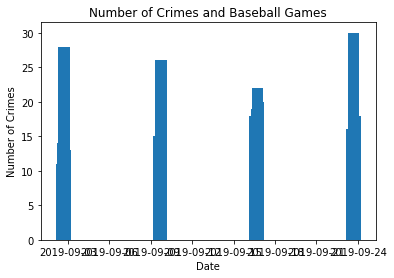

In [227]:
#Create a graph the total number of crimes per hour during these time periods

#concatinate all of the charts
number_of_crimes =pd.concat([beforeevent,duringevent,afterevent,beforeevent2,duringevent2,afterevent2,beforenoevent,duringnoevent,afternoevent,beforenoevent2,duringnoevent2,afternoevent2])
#create a bar graph
plt.bar(number_of_crimes.index,number_of_crimes["INCIDENT_NUMBER"])
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes and Baseball Games")

In [261]:
#Calculate the % change in crime during the entertainment events compared to your control dates/times

#percent change function
def percent_change(a,b):
    print(100 * ((b-a)/a))
#aggregate event data and control data
during = pd.concat([duringevent,duringevent2])
constant = pd.concat([duringnoevent,duringnoevent2])
#sum the number of crimes during both event and both constant dates
event_data_during = during.resample("M").sum()
constant_data_during = constant.resample("M").sum()
#use the percent change function
percent_change(constant_data_during.INCIDENT_NUMBER[0],event_data_during.INCIDENT_NUMBER[0])

0.8403361344537815


Did crime go up? Did crime go down? Did crime stay the same?
Crime went up by almost 1% when there was no event.  Even though crime went up slightly whent there was no game.